# Corpus Selection : Indian Tv Serial Review

#A. Research Question :
1.   "How do character perception and storyline influence audience engagement in Indian TV serials?"


#B.  Objectives :


1.   To analyze audience sentiment toward characters and storylines in Indian TV serials.
2.   To examine how character perception influences engagement and viewership.

#C. Methodology :

1. Sentiment analysis :  By applying NLP techniques for example - VADER  to
Applies NLP techniques (e.g., VADER) to categorize sentiment (positive, negative, neutral). Compares sentiment trends across sources.

2.  Frequent Word Analysis : Identifies the most common words and phrases in the dataset. Uses word clouds and frequency charts to highlight key discussion topics.

3.  KWIC(keywords in context) Analysis :
Identifies how key terms like - Character, story are used within sentences.Helps understand the tone and context of discussions








In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!pip install pdfplumber
!pip install nltk
!pip install wordcloud
!pip install seaborn
!pip install matplotlib
!pip install vaderSentiment

import os
import pdfplumber  # for PDF text extraction
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Step 2: Set folder path (Make sure 'reviews' folder is in Google Drive)
folder_path = "/content/drive/My Drive/reviews"
files = os.listdir(folder_path)

# Step 3: Read & Extract Text from PDFs and TXT Files
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + " "  # Extract text from each page
    return text.strip()

def read_text_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file :
        return file.read()

corpus = []
for file in files:
    file_path = os.path.join(folder_path, file)
    if file.endswith(".pdf"):
        corpus.append(extract_text_from_pdf(file_path))
    elif file.endswith(".txt"):
        corpus.append(read_text_file(file_path))

# Combine all text into one large corpus
corpus_text = " ".join(corpus)

# Step 4: Text Preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    return [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words and word.isalpha()]

processed_words = preprocess_text(corpus_text)



Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


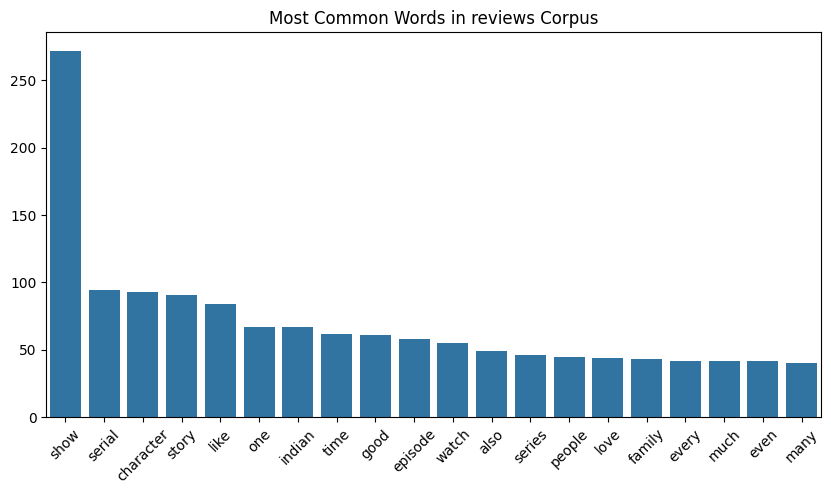

In [ ]:
# Step 5: Frequent Word Analysis
from collections import Counter

word_freq = Counter(processed_words)
common_words = word_freq.most_common(20)

# Plot Most Common Words
plt.figure(figsize=(10,5))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.xticks(rotation=45)
plt.title("Most Common Words in reviews Corpus")
plt.show()

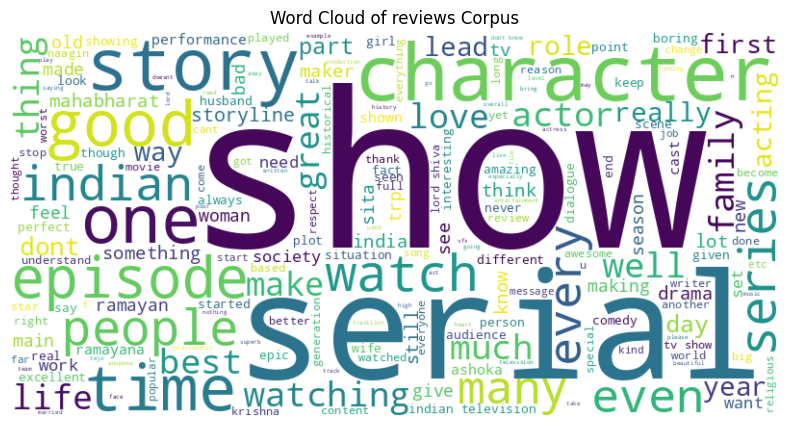

In [ ]:
# Step 6: Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(processed_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of reviews Corpus")
plt.show()

In [ ]:
# Step 7: Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()
sentiment_score = sia.polarity_scores(corpus_text)

# Print Sentiment Scores
print("Sentiment Analysis Results:")
print(sentiment_score)

Sentiment Analysis Results:
{'neg': 0.081, 'neu': 0.725, 'pos': 0.194, 'compound': 1.0}


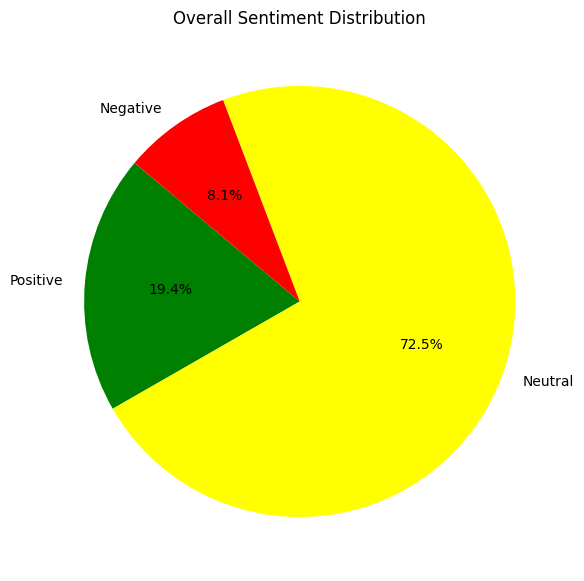

In [ ]:
# Step 8: Visualizing Sentiment
labels = ['Positive', 'Neutral', 'Negative']
sizes = [sentiment_score['pos'], sentiment_score['neu'], sentiment_score['neg']]
colors = ['green', 'yellow', 'red']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Overall Sentiment Distribution")
plt.show()

In [ ]:
import nltk
from nltk.text import Text

# Assuming 'corpus_text' contains your corpus data
corpus_text = " ".join(corpus)  # If 'corpus' is a list of documents
text_object = Text(nltk.word_tokenize(corpus_text))

# Define your keywords
keywords = ['character', 'show', 'show', 'serial','story','like']

# Perform KWIC analysis for each keyword
for keyword in keywords:
    print(f"KWIC for '{keyword}':")
    text_object.concordance(keyword, width=100, lines=5)
    print("\n")

KWIC for 'character':
Displaying 5 of 56 matches:
d father Champaklal Gada . Another prominent character is Atmaram Bhidhe , a Marathi tuition teache
nts lots of useful social messages ... Every character plays their role to perfection . Jethalal is
ch the show again and again everyday . Every character plays their role to perfection . Jethalal is
ound in this long time . All are my favorite character in this comedy serial . Specially Jetha Lal 
 Jetha Lal . Enjoyed a lot with each & every character & episode . To get more enjoy , more happine


KWIC for 'show':
Displaying 5 of 244 matches:
en describing a lot of humorous elements of the show like observational humor , using architectural 
 Taarak Mehta Ka Ooltah Chasmah is an excellent show ... A complete entertainer . All the characters
 Pandey are simply superb . I love to watch the show again and again everyday . I make it a point no
 Taarak Mehta Ka Ooltah Chasmah is an excellent show . I really love this show . The show is based 

# Interpretation of the Result
1. Frequent word Analysis : The most frequently occurring words in the corpus include show, serial, character, story . This indicates that the discussions in the corpus are centered around narrative elements, character development, and overall storytelling quality. The prominence of character suggests that audience engagement is heavily influenced by individual roles and performances, while plot and story highlight the significance of narrative progression in shaping viewer opinions. The presence of episode and plot signifies that reviews often evaluate the progression of the storyline across different episodes. Overall, the corpus reflects a keen interest in storytelling, character portrayal, and dramatic elements in TV serials.

  This suggests that audiences often discuss specific characters, indicating their significance in shaping perceptions of the show.

2. KWIC (Keywords in context) : Positive sentiment dominates character mentions, with phrases like "plays their role to perfection" and "favorite character."
This suggests that strong character development enhances audience enjoyment.
The KWIC analysis reveals that characters are central to audience engagement for several reasons: Characters are not just part of the show; they are the reason people watch.

This supports the hypothesis that people decide to watch shows based on the perceived importance of characters.


3. Sentiment Analysis :

 72.5% which is  high percentage of neutral reviews suggests that audiences discuss TV serials more descriptively rather than emotionally reacting to them.19.4% are positive, indicating appreciation for engaging plots, good acting, and emotional depth. 8.1% are negative, showing some criticism, likely about repetitive plots, weak performances, or unrealistic storytelling.

# conclusion :

Audience discussions primarily revolve around characters, storyline, and plot progression.

The prominence of character in frequent word analysis and KWIC suggests that characters play a crucial role in shaping audience perception and engagement.

KWIC analysis indicates that audiences strongly associate their enjoyment of a show with well-developed characters.

